In [20]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab.patches import cv2_imshow
import tensorflow as tf

In [21]:
model = load_model('image_classifier.h5')
class_names = ['нормальные фото', 'обнаженные_фото', 'сексуальные_цены', 'сцены_насилия']

In [29]:
def predict(image):
    print("predict")
    image = cv2.resize(image, (180, 180))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = image

    predictions = model.predict(image)
    score = tf.nn.softmax(predictions[0])
    class_name = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)
    return class_name, confidence

In [23]:
def extract_frames(video_path, skip_frames=30):
    video = cv2.VideoCapture(video_path)
    print("extract_frames")
    frames = []
    frame_idx = 0
    while True:
        ret, frame = video.read()
        if not ret:
            break
        if frame_idx % skip_frames == 0:
            frames.append(frame)
        frame_idx += 1
    video.release()
    return frames

In [63]:
def classify_frames(frames):
    print("classify_frames")
    results = []
    for frame in frames:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        class_name, confidence = predict(frame_rgb)
        normal = False
        if class_name == "нормальные фото":
            if confidence > 50:
                print(f"нормальное фото {confidence:.2f}%")
                normal = True
            else:
                print("спам")
                # results.append({"confidence": confidence, "class_name": class_name, "normal": normal})
                print({"confidence": confidence, "class_name": class_name, "normal": normal})
                cv2_imshow(frame)
                return False
        else:
            if confidence >= 30:
                print(f"Спам, {class_name}, {confidence:.2f}%")
                cv2_imshow(frame)
                return False
            else:
                cv2_imshow(frame)
                return False
                print(f"нормальное фото, {class_name}, {confidence:.2f}%")

        results.append({"confidence": confidence, "class_name": class_name, "normal": normal})
        cv2_imshow(frame)  # Используем cv2_imshow вместо cv2.imshow
        if cv2.waitKey(25) & 0xFF == ord('q'):  # Проверка на нажатие 'q' для выхода (необходимо изменить для Colab)
            break
    cv2.destroyAllWindows()
    return results

extract_frames
classify_frames
predict
1/1 [==============================] - 0s 31ms/step
нормальное фото 93.60%


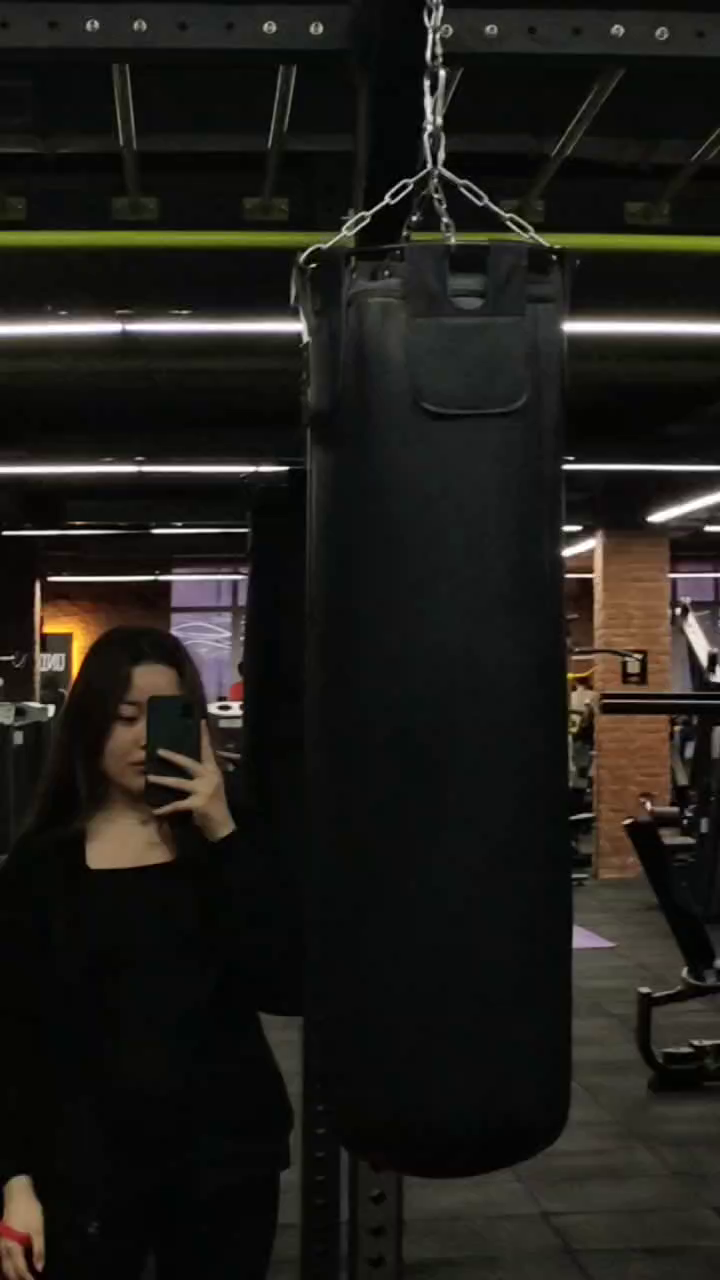

predict
1/1 [==============================] - 0s 34ms/step
нормальное фото 94.49%


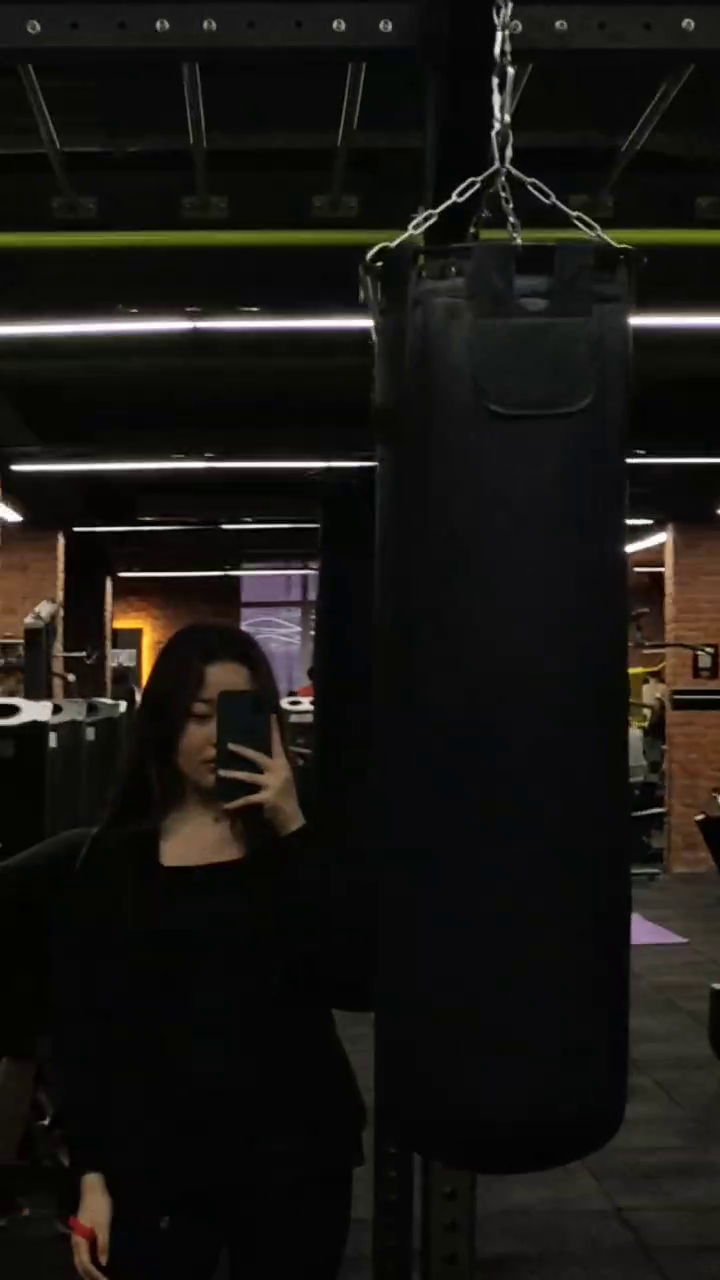

predict
1/1 [==============================] - 0s 41ms/step
нормальное фото 97.32%


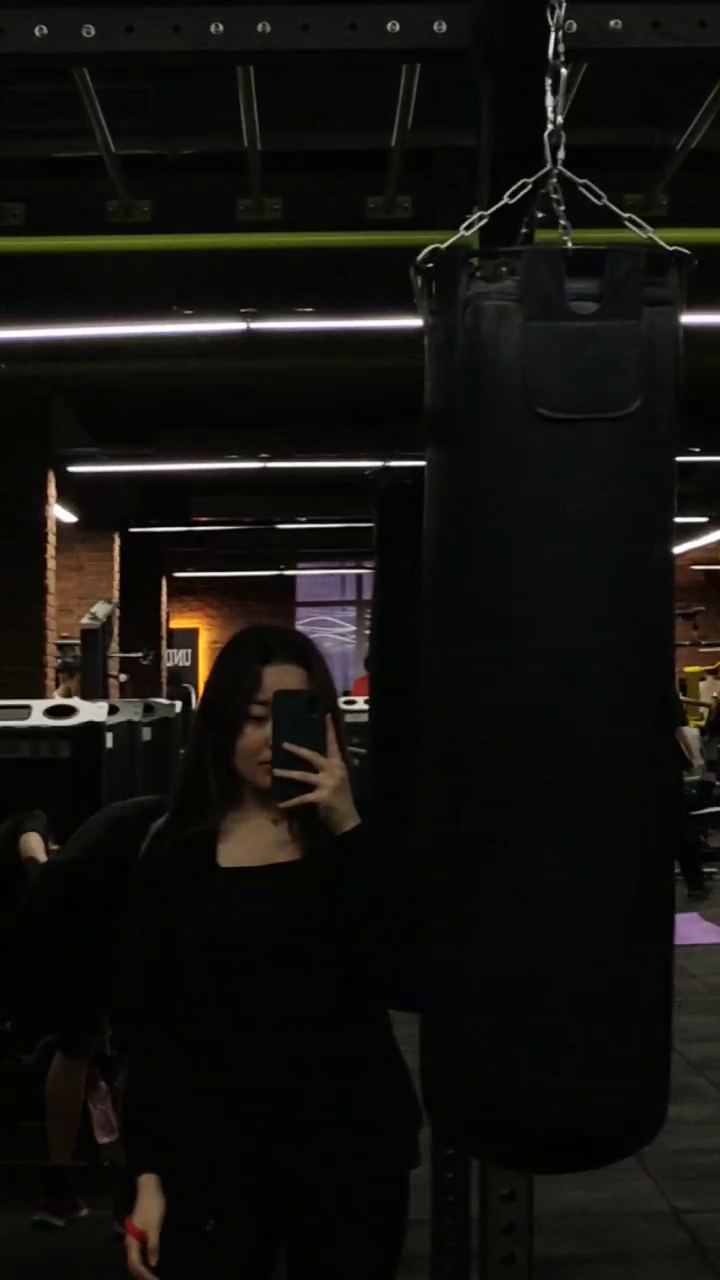

predict
1/1 [==============================] - 0s 37ms/step
нормальное фото 96.54%


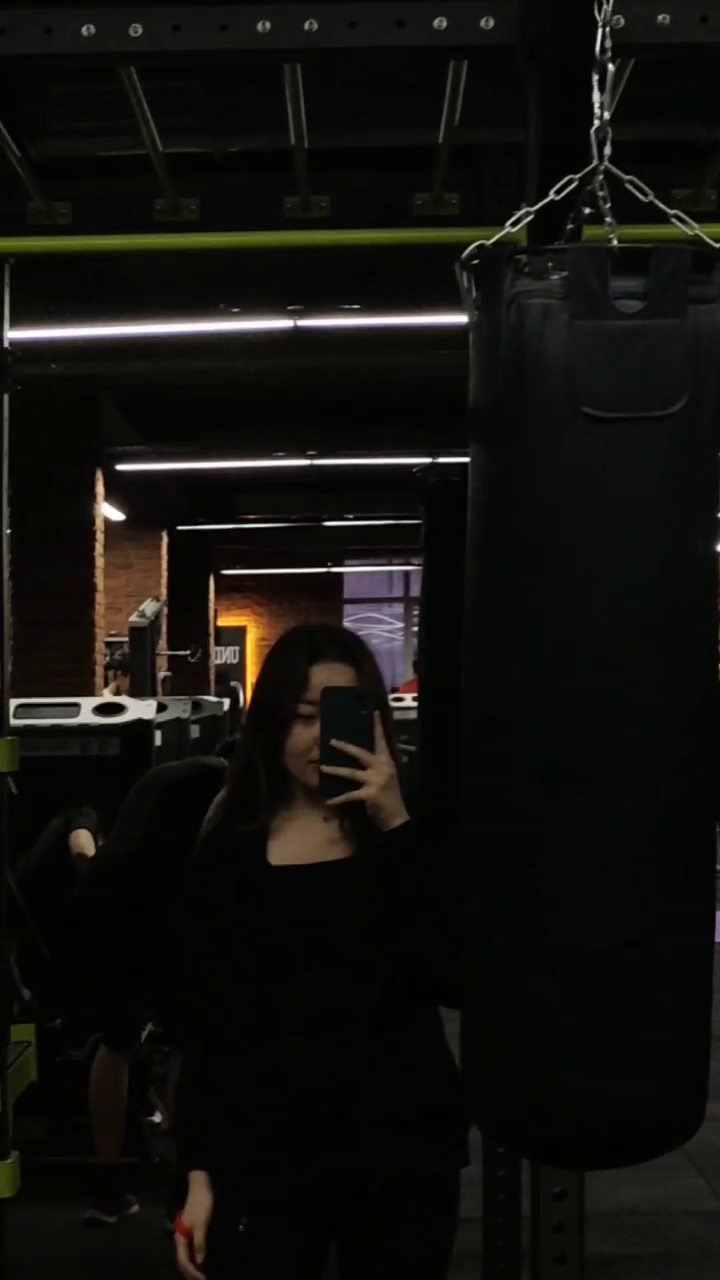

predict
1/1 [==============================] - 0s 58ms/step
нормальное фото 92.06%


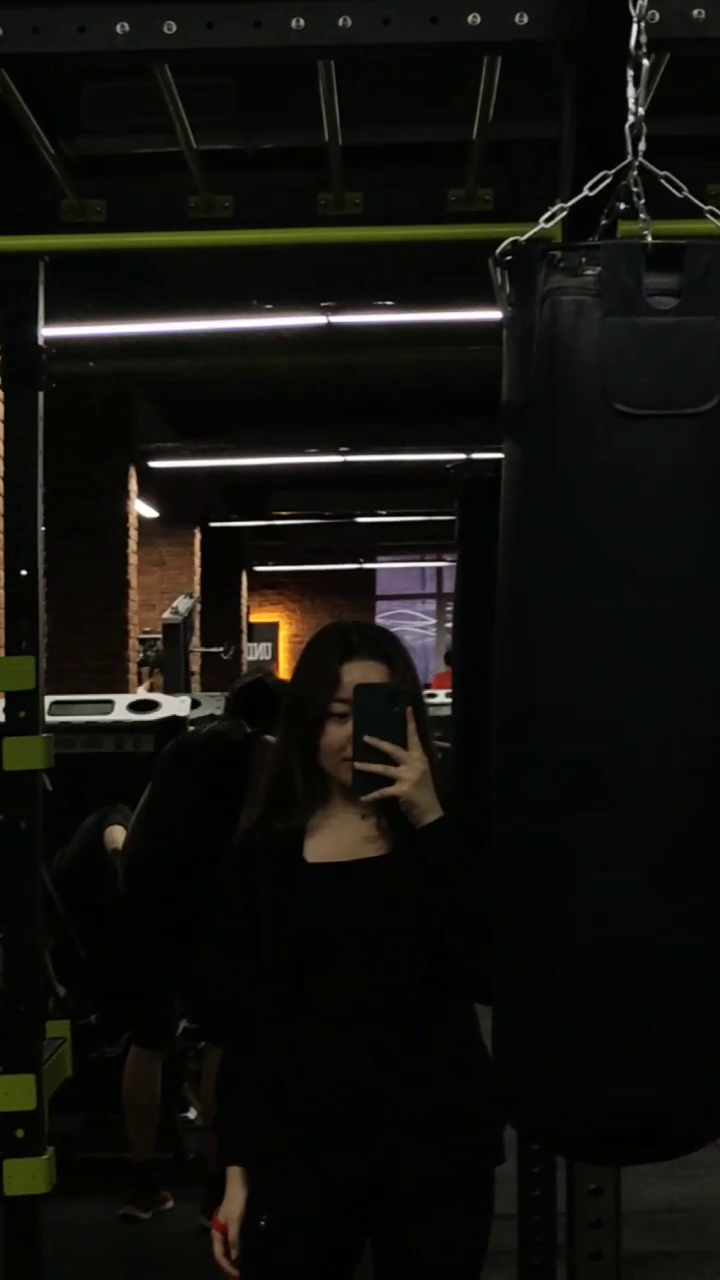

predict
1/1 [==============================] - 0s 55ms/step
нормальное фото 81.51%


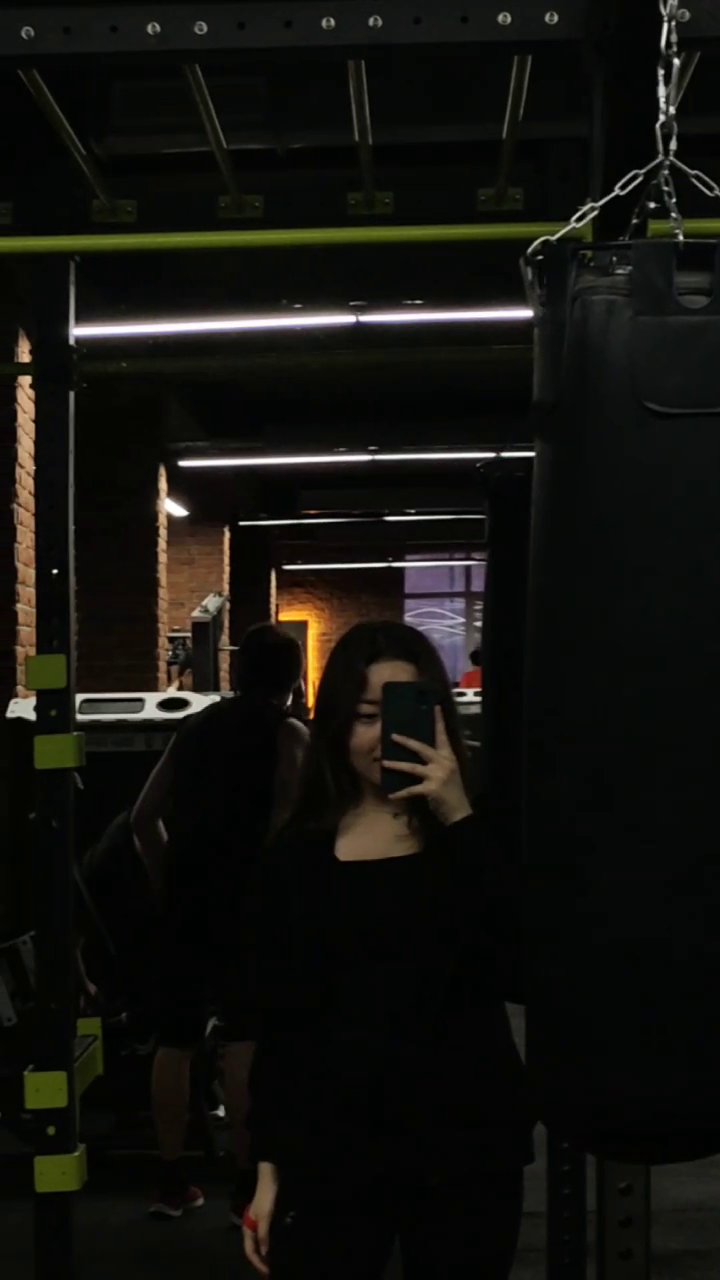

predict
1/1 [==============================] - 0s 64ms/step
нормальное фото 86.30%


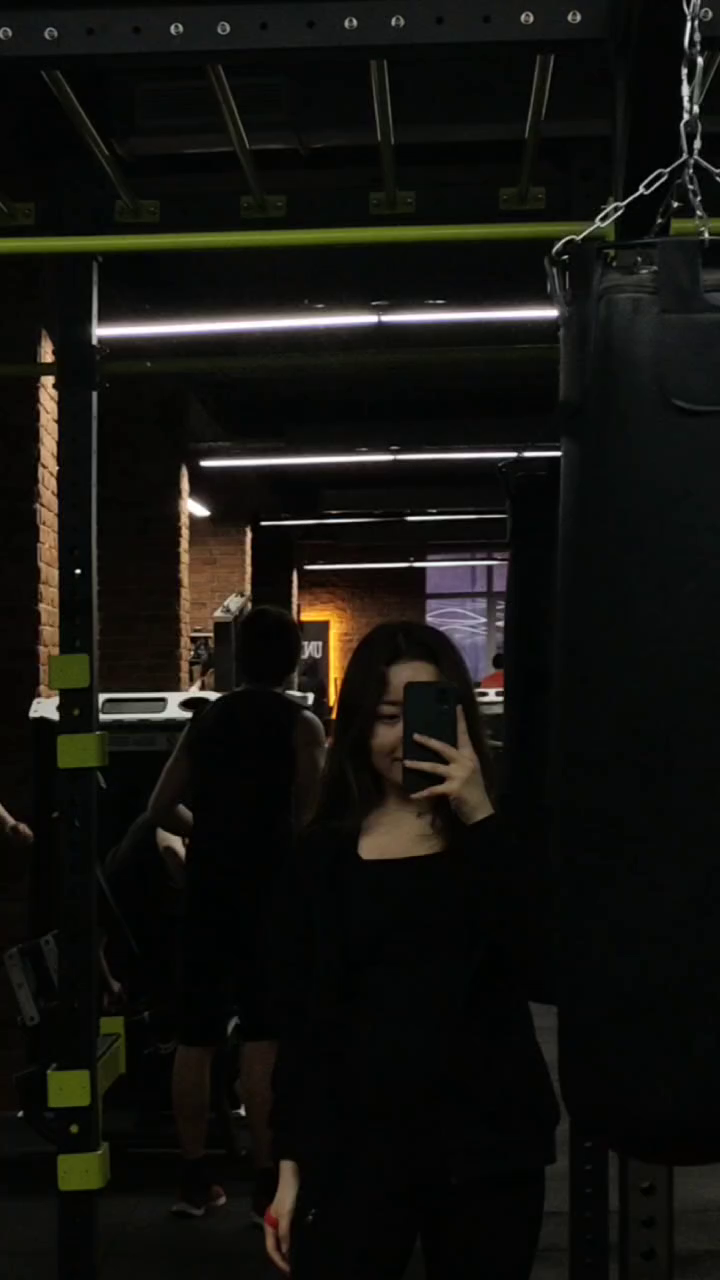

predict
1/1 [==============================] - 0s 59ms/step
нормальное фото 85.60%


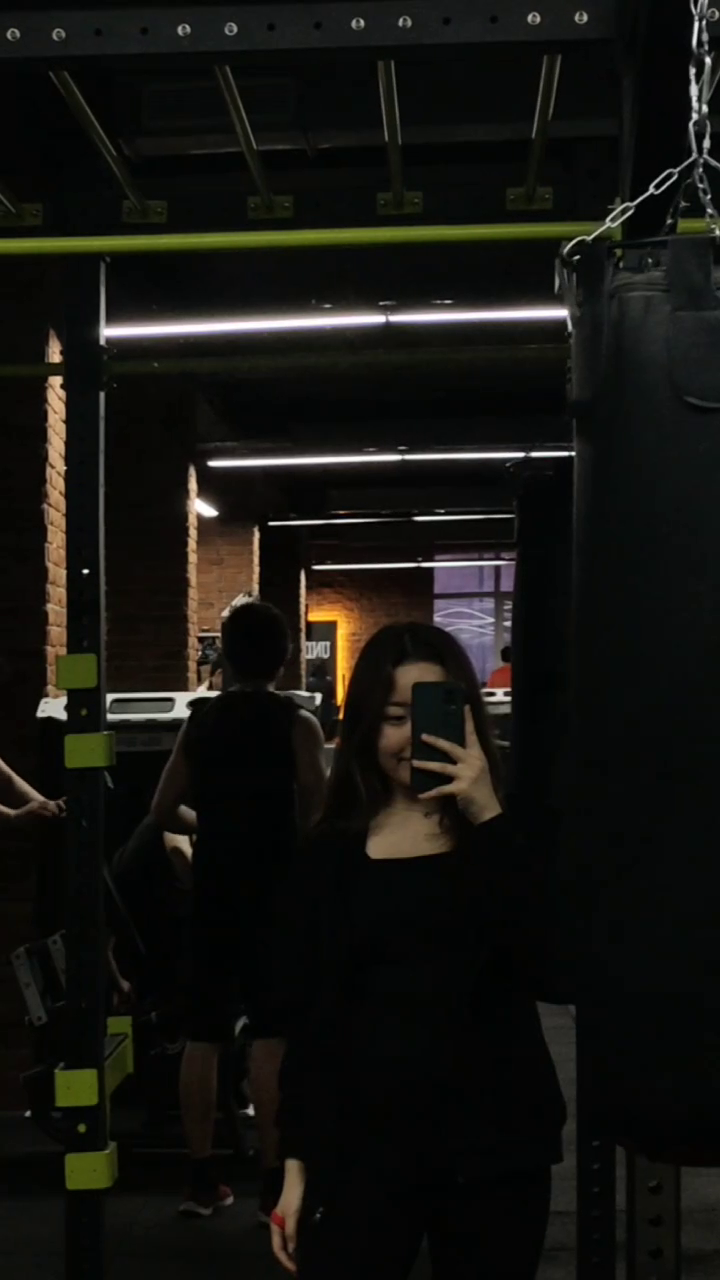

predict
1/1 [==============================] - 0s 49ms/step
нормальное фото 84.01%


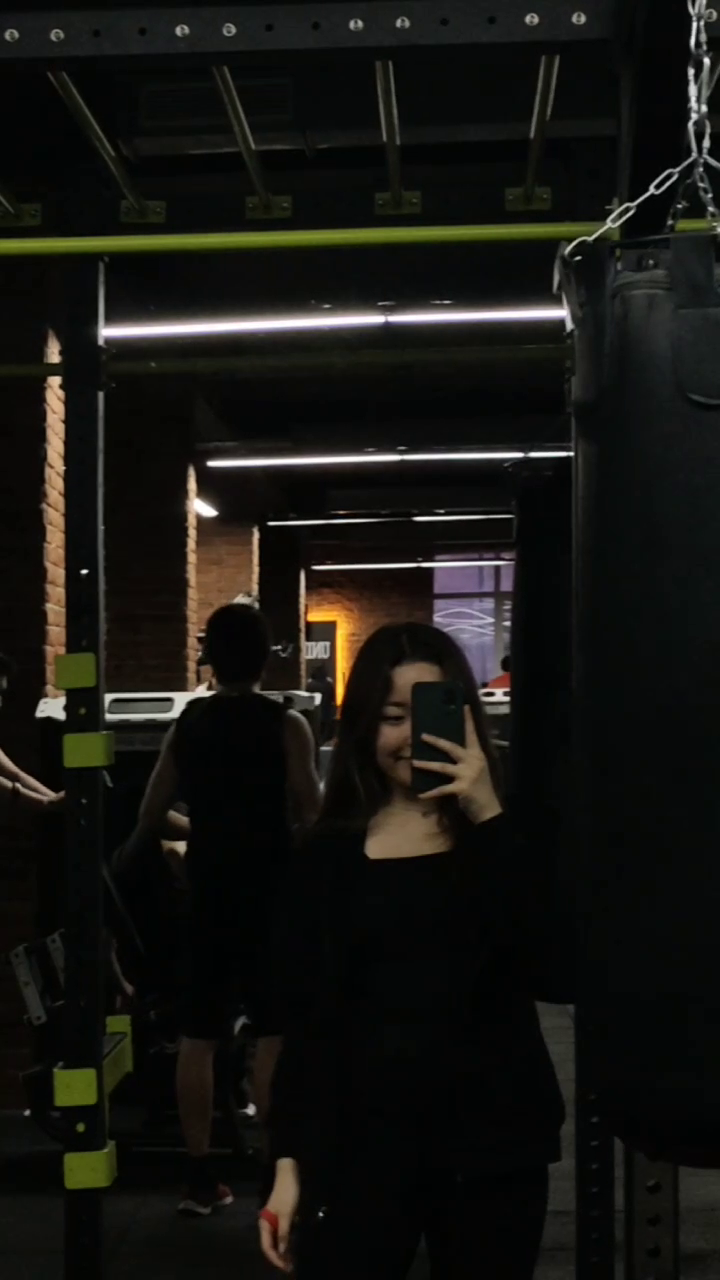

predict
1/1 [==============================] - 0s 45ms/step
нормальное фото 86.11%


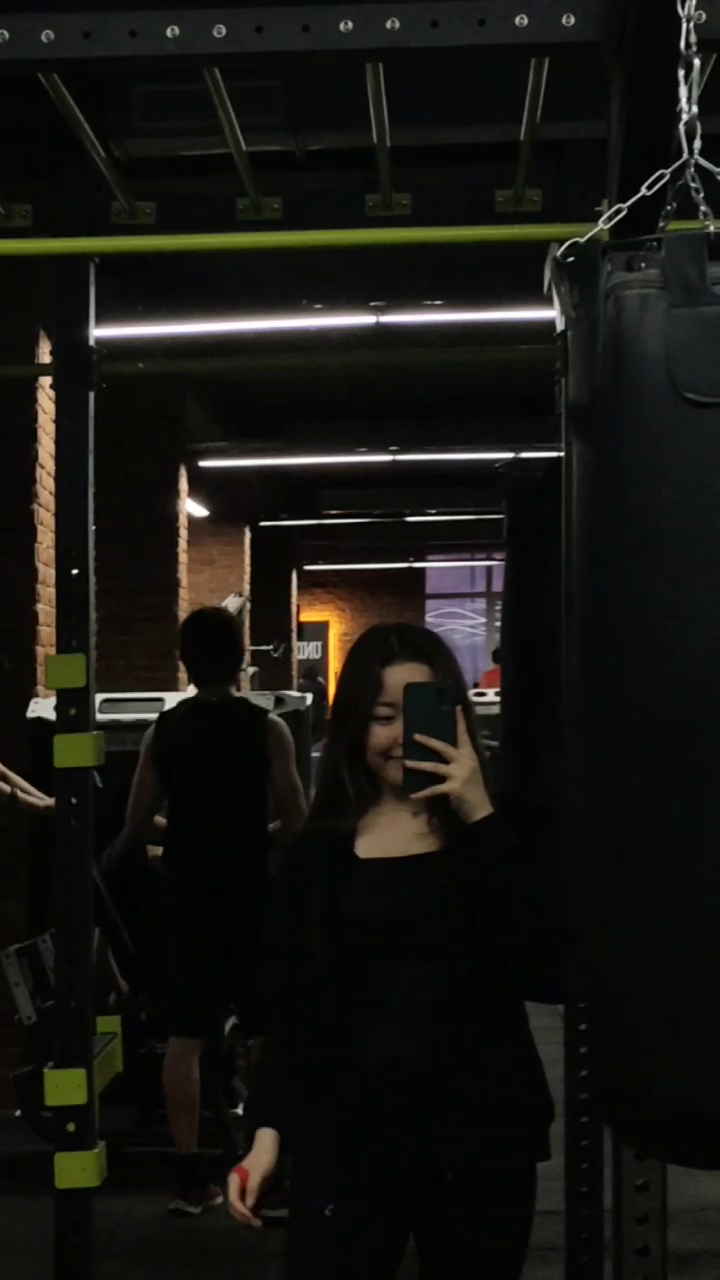

predict
1/1 [==============================] - 0s 45ms/step
нормальное фото 83.22%


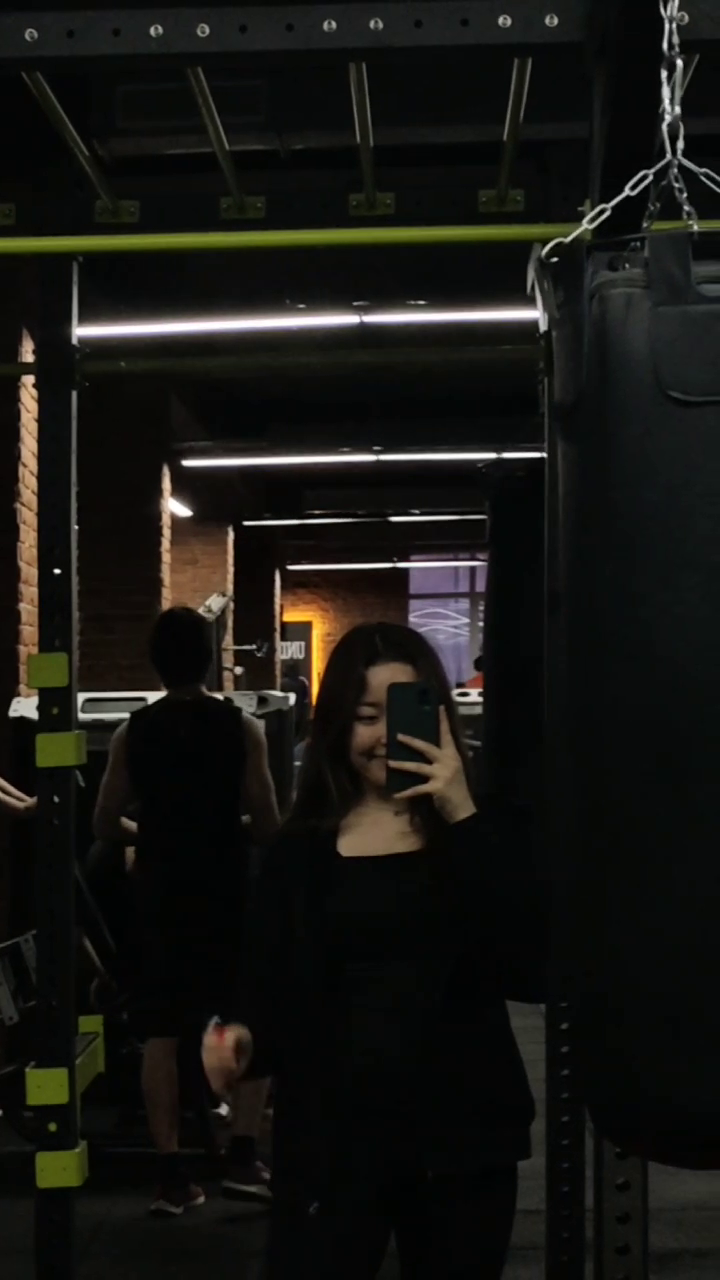

Good video?  - True


In [66]:
good_video = True
# video_path = 'meatVIDEO.mp4'
video_path = 'uiu.mp4'
# --
# video_path = 'qaw.mp4'
frames = extract_frames(video_path, skip_frames=5)
result = classify_frames(frames)
if str(result)=="False":
    good_video=False

print("Good video?  -",good_video)
